# Projet TER

### Classification de tweets

Le but de ce projet est de pouvoir faire la différence entre des tweets positifs et des tweets négatifs. Nous allons prendre les tweets comme un ensemble de symboles. 

Rappel, qu'est ce qu'un tweet. Un tweet est un petit message de 140 caractères maximum diffusé sur la plateforme Twitter. Les tweets d'un auteur sont diffusés auprès de ses followers ou abonnés, c'est à dire les individus ayant choisi de suivre la publication de ses petits messages. (cf http://www.definitions-marketing.com/definition/tweet/)  

Nous avons donc à traiter des petits messages qui peuvent contenir des phrases, des émoticônes et/ou des mots clés précédés par le symbole "#".

Nous allons donc développer un modele suivant ces étapes:

**1) Exploration puis préparation des données sous forme exploitable.** 
C'est à dire créer un dictionnaire. Nous avons donc deux choix, prendre un vocabulaire de taille importante, et long au traitement, ou prendre un vocabulaire petit, pas nécésairement le plus complet mais plus éfficace. Si on prend la première approche (comme dans cet article https://www-cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf) on devra utiliser environ 400 à 500 mots. Cependant, si nous pouvons avoir accés à un vocabulaire plus grand et libre, nous l'utiliseront. 
Dans le corpus donné en exemple nous avons 1 578 627 phrases, c'est à dire des exemples de tweets. Cela nous fait un vocabulaire très grand. Il nous faudra donc le reduire à un nombre traitable.

**2) Filtrage des données éventuel.**
Ensuite pour le cas du filtrage, nous devront faire une analyse sur les mots clés les plus utilisés et les plus pertient. Le niveau d'optimisation que l'on pourra atteindre dependra de la taille initiale de notre vocabulaire mais plus il sera grand plus on pourra optimiser. On estime que même avec une grande base de données de mots il y aura des tweets que l'on ne pourra pas analyser completement, c'est à dire des tweets neutres, donc autant mieux se centrer sur ameliorer la réactivité de notre algorithme. 

**3)Préparation d'une partition : apprentissage, validation et test.**
Pour finir, nous devrons utiliser plusieurs modèles afin de pouvoir correler nos résultats. Par exemple nous pouvons prendre un modèle basé sur les mots clés, mais aussi, comme décrit dans l'article vu avant, une méthode probabilistique, dite bayésienne naïve, par enthropie maximale et avec des vector machines, qui, en gros, cherchent la présence ou abscence d'une caracteristique d'un mot (pour voir s'il est positif ou négatif). 


In [1]:
#this version is to find how many training_tweets
#try to create a dictionary
#So what we do is go through the text=ligne[3], if the word of ligne[3:] not in the dictionary we put it in
#otherwise,we do nothing
#this is the attribute of each line
#the type of line <type 'str'>
#line: 1578627,0,Sentiment140,"Zzzzzzzzzzzzzzzzzzz, I wish "
# we stock all the sentence into the X_train
# the sentiment into the Y_train
import sys
import numpy as np
filename = 'Dataset.csv'

nbLignes = 0

X_train=[]
Y_train=[]

for line in open(filename,"r"):
    ligne=line.split(',')
    text=''
    for i in range(3,len(ligne)):
        if (i!=len(ligne)-1):
            text=text+ligne[i]+","
        else:
            text+=ligne[i]
    X_train.append(text)
    Y_train.append(ligne[1])
    nbLignes=nbLignes+1
    
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

X_test=X_train[-100000:]
Y_test=Y_train[-100000:]

X_train=X_train[1:100001]
Y_train=Y_train[1:100001]

print "tweet: ",X_train[-1]
print "the number of training set:",len(X_train)
print "the number of test set:",len(X_test)
print "Nombre de tweets: ", nbLignes-1


tweet:  @cupcake_kayla haha yes you do 

the number of training set: 100000
the number of test set: 100000
Nombre de tweets:  1578627


In [2]:
dictionary={}
dictionary_inverse={}
def get_word(x):
    word=""
    word_list=[]
    flag=True
    for i in range(len(x)):
        if x[i].isalpha() or x[i]=="@" or x[i]=="&":
            if flag:
                word+=x[i]
                if i+1==len(x):
                    word_list.append(word)
            else:
                flag=True
                word+=x[i]

        else:
            flag=False
            if word!="":
                word_list.append(word)
            word=""
        if word=="http" or word=="www":
            word_list.append(x)
            break
    return word_list
couts=[]
k=0
for sentense in X_train:
    word_list=get_word(sentense)
    for word in word_list:
        if word not in dictionary:
            dictionary[word]=k
            k+=1
            dictionary_inverse[k]=word
            couts.append(1)
        else:
            index=dictionary[word]
            couts[index]+=1

print "the length of the dictionary:",len(dictionary)

the length of the dictionary: 118257


In [3]:
vocab_size=0
for k in couts:
    if(k>20):
        if (k<10000):
            vocab_size+=1
            
print "the size of the vocabulary",vocab_size

the size of the vocabulary 4098


In [4]:
new_dictionary={}
new_dictionary_inverse={}
k=2
for i in range(len(couts)):
    if (couts[i]>20):
        if (couts[i]<10000):
            word=dictionary_inverse[i]
            new_dictionary[word]=k
            new_dictionary_inverse[k]=word
            k+=1
print "the length of the new_dictionary:",len(new_dictionary)
print "the value max: ",k
print new_dictionary_inverse[2]

the length of the new_dictionary: 4098
the value max:  4100
is


The size of the new_dictionary is 29104

That is the size of the vacabulary and with 4 words to replace the word we can't recognize.

new_dictionary is {word: index}
new_dictionary_inverse is {index:word} 

The next step is trying to make the X_train represent in number

train and test is the np.array list that represente the word in the l'index

In [5]:
def change_into_number(sentense):
    word_list=get_word(sentense)
    l=[1 for i in range(len(word_list))]
    for i in range(len(word_list)):
        if word_list[i] in new_dictionary:
            k=new_dictionary[word_list[i]]
            l[i]=k
    return l

New_X_train=[]

for tweet in X_train:
    New_X_train.append(change_into_number(tweet))
train=np.asarray(New_X_train)
            
            

In [6]:
New_X_test=[]
for sentense in X_test:
    New_X_test.append(change_into_number(sentense))
test=np.asarray(New_X_test)


In [7]:
print test[0]

[25, 1, 503, 1, 512, 1, 1, 71, 102, 440, 1]


In [8]:
from keras.preprocessing import sequence
def sent2binaryVector (sentence): 
    v = np.zeros([vocab_size])
    for i in range(len(sentence)):
        v[sentence[i]-1]=1 
    return v



def convertCorpus2binary(corpus):
    M = np.zeros([len(corpus),vocab_size])
    i=0
    for x in corpus:
        v = sent2binaryVector(x)
        M[i,:] = v
        i+=1
    return M

print "Start construct the vector of train"
Vtrain =sequence.pad_sequences(train,maxlen=140)
print "Start construc the vector of test"
Vtest = sequence.pad_sequences(test,maxlen=140)
print "End of constructing"

Using TensorFlow backend.


Start construct the vector of train
Start construc the vector of test
End of constructing


In [13]:
print Vtrain[2]

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 11 12  1]


In [14]:
print X_train[2]

              omg its already 7:30 :O



In [15]:
print train[2]

[10, 11, 12, 1]


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=140))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode='same', activation='relu'))
model.add(MaxPooling1D(pool_length=140))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
model = Sequential()
model.add(Embedding(input_dim=vocab_size+2, output_dim=50, input_length=140))
model.add(Flatten())
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dense(1, activation='sigmoid'))

In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_7 (Embedding)          (None, 140, 50)       205000      embedding_input_7[0][0]          
____________________________________________________________________________________________________
flatten_2 (Flatten)              (None, 7000)          0           embedding_7[0][0]                
____________________________________________________________________________________________________
dense_22 (Dense)                 (None, 100)           700100      flatten_2[0][0]                  
____________________________________________________________________________________________________
activation_5 (Activation)        (None, 100)           0           dense_22[0][0]                   
___________________________________________________________________________________________

In [93]:
from keras.layers.core import Merge
model1 = Sequential()
model1.add(Embedding(input_dim=vocab_size+2, output_dim=50, input_length=140))
model2 = Sequential()
model2.add(Merge([model1,model1], mode='ave'))
model2.add(Dense(100))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()
history = model2.fit(Vtrain, Y_train,
        nb_epoch=5,
        batch_size=32,
        validation_data=(Vtest, Y_test))

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_22 (Embedding)         (None, 140, 50)       205000                                       
____________________________________________________________________________________________________
dense_30 (Dense)                 (None, 140, 100)      5100        merge_10[0][0]                   
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 140, 100)      0           dense_30[0][0]                   
____________________________________________________________________________________________________
flatten_3 (Flatten)              (None, 14000)         0           activation_9[0][0]               
___________________________________________________________________________________________

<class 'keras.callbacks.History'>
{'acc': [0.69094, 0.71753999999999996, 0.72709999999999997, 0.73926000000000003, 0.75231000000000003], 'loss': [0.58745762008666991, 0.55734222839355474, 0.54246665940284733, 0.52469838127136226, 0.5049039455986023], 'val_acc': [0.68003999999999998, 0.69015000000000004, 0.67559000000000002, 0.67345999999999995, 0.66566000000000003], 'val_loss': [0.58893821722507478, 0.57932377939224244, 0.59838678619861607, 0.61031226181983944, 0.63428858681201938]}
[0, 1, 2, 3, 4]


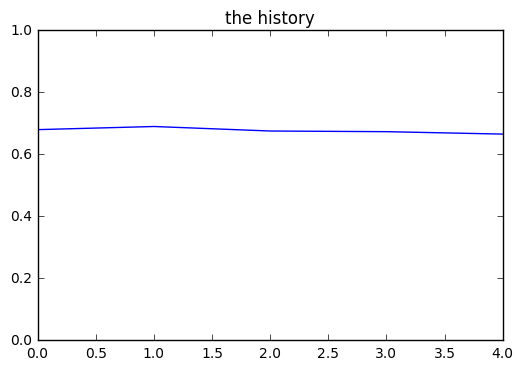

In [94]:
import matplotlib.pyplot as plt
print type(history)
print history.history
print history.epoch
def graph(history,flag):
    plt.ylim(0,+1)
    if flag:
        plt.plot(np.arange(len(history.epoch)), history.history['acc'])
    else:
        plt.plot(np.arange(len(history.epoch)), history.history['val_acc'])
    plt.title("the history")
    plt.show()
graph(history,False)
poid=model.get_weights()

In [14]:
import numpy as np
def poids(poid):
    k=0
    plus_grand=[]
    plus_petit=[]
    #print poid[0]
    res=np.argsort(poid[0],axis=0)
    for i in res:
        if k<20:
            plus_petit.append(poid[0][res[k]])
        else:
            break
        k+=1
    k=1
    for i in res:
        if k<11:
            plus_grand.append(poid[0][res[-k]])
        else:
            break
        k+=1
    print plus_grand
    print "-------------------"
    print plus_petit
    # np.argsort() # 将数组排序之后的index返回
poids(model.get_weights())

[array([[ 0.4869796 , -0.171763  , -0.06582582, ...,  0.20570605,
        -0.2793228 ,  0.03776712],
       [ 0.30103487,  0.73684603, -0.06986356, ...,  0.24575271,
         0.33929613, -0.32587844],
       [ 0.1549482 ,  0.29789916,  0.57141888, ...,  0.15350258,
        -0.22219868,  0.06145204],
       ..., 
       [ 0.15596038,  0.32237813, -0.10899381, ...,  0.61173278,
         0.44018126, -0.17855947],
       [-0.03467021,  0.58533984, -0.27004698, ...,  0.02554657,
         0.70859587, -0.33603677],
       [-0.57472509,  0.27670363, -0.5517773 , ..., -0.52729112,
         0.31567031,  0.58021098]], dtype=float32), array([[ 0.47967777,  0.43723997, -0.1912353 , ...,  0.38028565,
         0.10423629, -0.0742928 ],
       [ 0.34948862,  0.6403178 , -0.34969246, ...,  0.49553847,
         0.46800193, -0.49837932],
       [-0.052233  ,  0.03036935,  0.49862486, ..., -0.15574591,
         0.26214206, -0.17356911],
       ..., 
       [ 0.42346421,  0.51658422, -0.4979386 , ...,  0.5